In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

In [3]:
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


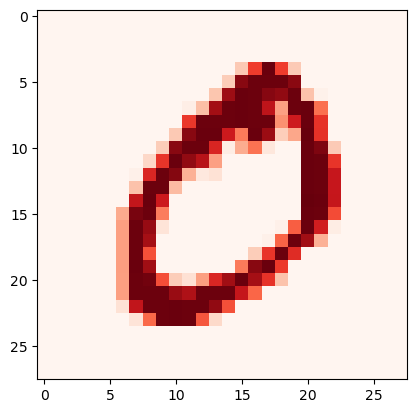

In [4]:
plt.imshow(x_train[1], cmap="Reds")

In [5]:
#model_lr = tf.keras.models.Sequential([ 
    #layers.Dense(10, activation= 'softmax', input_shape=x_train.shape[1:])
    #]) 
#model_lr.compile(optimizer='adam', loss='categorical_crossentropy')
#model_lr.summary()

In [6]:
#flattening it to 2d
# the x_train.shape[1:] has been moved up to ensure the inpur layer specifically defines whats going on in the model. the model is being told prior of the shape it is going to take
#layers functions allow for the communication between all layers 
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation= 'softmax')
    ]) 
model_lr.compile(optimizer='adam', loss='categorical_crossentropy')
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
#model_lr.fit(x_train, y_train)

In [8]:
#train the data to fit the model
#y_onehot_train= tf.one_hot(y_train, 10)
#model_lr.fit(x_train, y_onehot_train)

In [9]:
#train the model to fit the data... introduce sparse_categorical_crossentropy

In [10]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation= 'softmax')
    ]) 
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
#model_lr.fit(x_train, y_train)

In [12]:
#model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_split= 0.2)

In [13]:
history_lr= model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data= (x_test, y_test), verbose=False)

In [14]:
history_lr.history

{'loss': [12.170833587646484,
  4.89858865737915,
  3.925983190536499,
  3.4301838874816895,
  3.1549675464630127,
  2.9281249046325684,
  2.788789987564087,
  2.76503324508667,
  2.663245916366577,
  2.6213130950927734],
 'accuracy': [0.8110499978065491,
  0.8761833310127258,
  0.8840833306312561,
  0.887233316898346,
  0.8888000249862671,
  0.8908166885375977,
  0.8924499750137329,
  0.8891833424568176,
  0.892216682434082,
  0.8916166424751282],
 'val_loss': [5.079182147979736,
  4.285412311553955,
  4.002157211303711,
  3.3632147312164307,
  3.575180768966675,
  3.1106314659118652,
  3.343305826187134,
  3.2153401374816895,
  3.3941428661346436,
  2.8605313301086426],
 'val_accuracy': [0.8801000118255615,
  0.8884000182151794,
  0.8820000290870667,
  0.8903999924659729,
  0.8889999985694885,
  0.8913000226020813,
  0.8755000233650208,
  0.8914999961853027,
  0.8784999847412109,
  0.9003999829292297]}

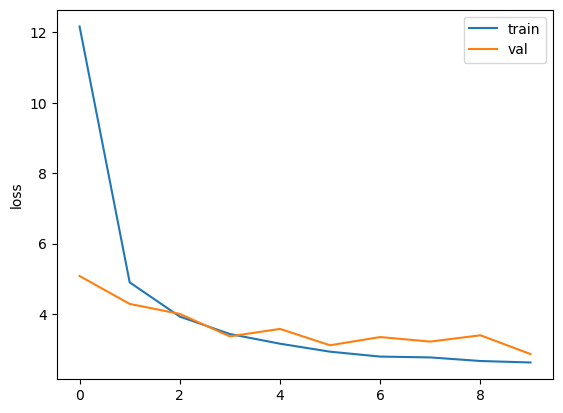

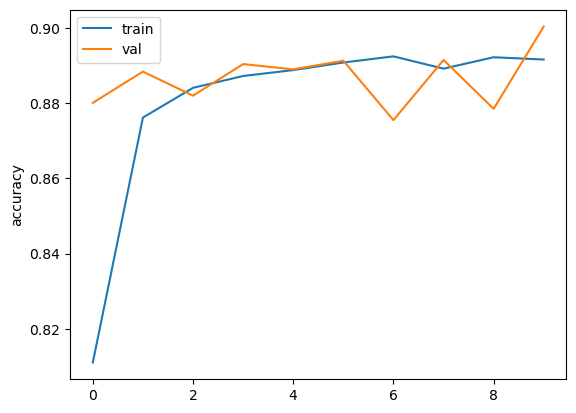

In [15]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [16]:
model_lr.evaluate (x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.8605 - accuracy: 0.9004


[2.8605306148529053, 0.9003999829292297]

1/1 [==============================] - 0s 31ms/step
[0.0000000e+00 0.0000000e+00 0.0000000e+00 8.1273820e-28 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.0387683e-36] => 7


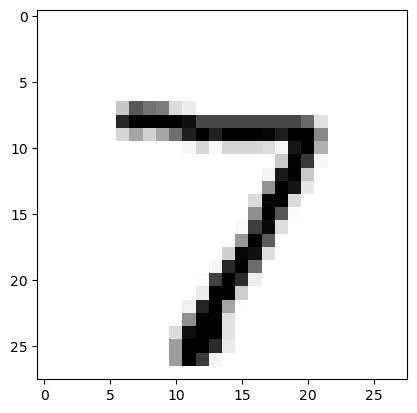

[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 8.138736e-28 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00] => 2


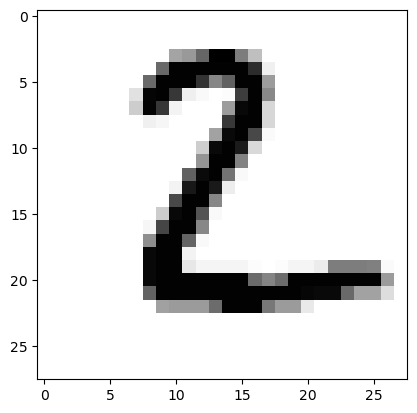

[0.0000000e+00 1.0000000e+00 6.6113718e-28 7.1351199e-33 0.0000000e+00
 1.4214001e-38 3.4702615e-27 0.0000000e+00 1.2483331e-23 1.3894737e-32] => 1


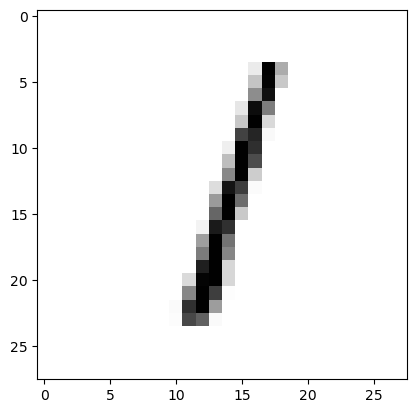

In [19]:
probs=model_lr.predict(x_test[:5])
preds=np.argmax(probs, axis=1)
for i in range (3):
    print(probs[i], "=>", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [ ]:
#model_lr.predict (x_test[18] will output an error message

In [20]:
model_lr.predict (x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 114ms/step


array([[0.0000000e+00, 0.0000000e+00, 9.9999988e-01, 1.1640383e-19,
        9.6524939e-36, 2.2741031e-09, 1.0969335e-36, 0.0000000e+00,
        6.5234786e-08, 0.0000000e+00]], dtype=float32)

In [22]:
#Another option is to slice
model_lr.predict (x_test[18:19])

1/1 [==============================] - 0s 38ms/step


array([[0.0000000e+00, 0.0000000e+00, 9.9999988e-01, 1.1640383e-19,
        9.6524939e-36, 2.2741031e-09, 1.0969335e-36, 0.0000000e+00,
        6.5234786e-08, 0.0000000e+00]], dtype=float32)

In [25]:
#this is a more complicated model based on the changes of the activation functions and the additional 
#dense layers which increase the number of parameters compared to the previous model which had only one dense layer.

model_mlp = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation= 'elu'),
    layers.Dense(64, activation= 'elu'),
    layers.Dense(10, activation= 'softmax')
    ]) 
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_mlp= model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data= (x_test, y_test), verbose=False)

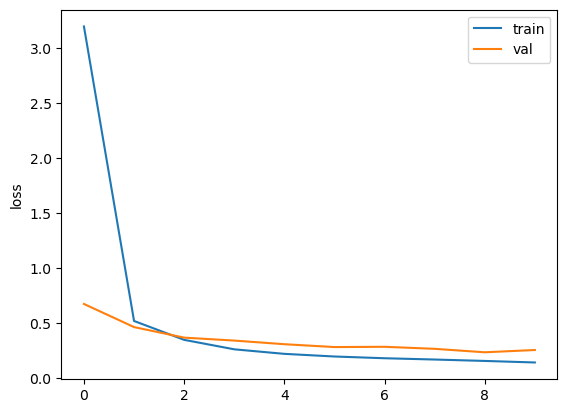

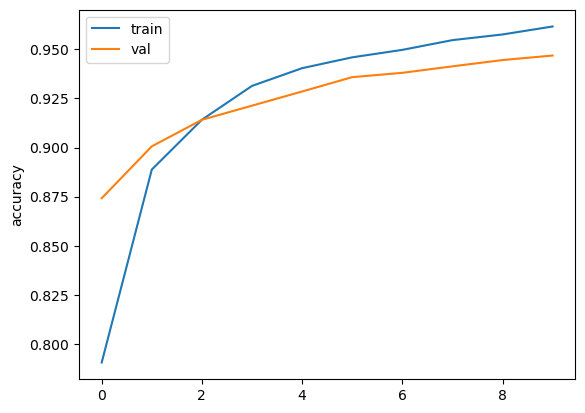

In [27]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()